In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [153]:
df=pd.read_csv("C:\\python\\uni_prediction\\uni_rating.csv",encoding="latin-1")
df.head()

,Name,Location,Rank,Description,Tuition and fees,In-state,Undergrad Enrollment
0,Princeton University,"Princeton, NJ",1,"Princeton, the fourth-oldest college in the Un...","$45,320",NaN,"5,402"
1,Harvard University,"Cambridge, MA",2,"Harvard is located in Cambridge, Massachusetts...","$47,074",NaN,"6,699"
2,University of Chicago,"Chicago, IL",3,"The University of Chicago, situated in Chicago...","$52,491",NaN,"5,844"
3,Yale University,"New Haven, CT",3,"Yale University, located in New Haven, Connect...","$49,480",NaN,"5,532"
4,Columbia University,"New York, NY",5,"Columbia University, located in Manhattan's Mo...","$55,056",NaN,"6,102"


In [154]:
df.shape

(231, 7)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Name                  231 non-null    object
 1   Location              231 non-null    object
 2   Rank                  231 non-null    int64 
 3   Description           231 non-null    object
 4   Tuition and fees      231 non-null    object
 5   In-state              133 non-null    object
 6   Undergrad Enrollment  231 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.8+ KB


In [156]:
# Renaming the columns for easy usage 
df.rename(columns={"Name":"name","Location":"location","Rank":"rank","Description":"desc",
                   "Tuition and fees":"fees","In-state":"instate","Undergrad Enrollment":"ug_grad"},inplace=True)

In [157]:
df.head()

,name,location,rank,desc,fees,instate,ug_grad
0,Princeton University,"Princeton, NJ",1,"Princeton, the fourth-oldest college in the Un...","$45,320",NaN,"5,402"
1,Harvard University,"Cambridge, MA",2,"Harvard is located in Cambridge, Massachusetts...","$47,074",NaN,"6,699"
2,University of Chicago,"Chicago, IL",3,"The University of Chicago, situated in Chicago...","$52,491",NaN,"5,844"
3,Yale University,"New Haven, CT",3,"Yale University, located in New Haven, Connect...","$49,480",NaN,"5,532"
4,Columbia University,"New York, NY",5,"Columbia University, located in Manhattan's Mo...","$55,056",NaN,"6,102"


In [158]:
# fixing the data types of fess , ug_grad column datatype as it should be numerical not object 


In [159]:
#handling the fees column
df["fees"]=df["fees"].str.replace("$","")
df["fees"]=df["fees"].str.replace(",","")
df["fees"]=df["fees"].astype("float")

In [160]:
df.head()

,name,location,rank,desc,fees,instate,ug_grad
0,Princeton University,"Princeton, NJ",1,"Princeton, the fourth-oldest college in the Un...",45320.0,NaN,"5,402"
1,Harvard University,"Cambridge, MA",2,"Harvard is located in Cambridge, Massachusetts...",47074.0,NaN,"6,699"
2,University of Chicago,"Chicago, IL",3,"The University of Chicago, situated in Chicago...",52491.0,NaN,"5,844"
3,Yale University,"New Haven, CT",3,"Yale University, located in New Haven, Connect...",49480.0,NaN,"5,532"
4,Columbia University,"New York, NY",5,"Columbia University, located in Manhattan's Mo...",55056.0,NaN,"6,102"


In [161]:
#successfully handeled the fees column
df["fees"].unique()

array([45320., 47074., 52491., 49480., 55056., 47940., 48452., 51265.,
       51464., 50410., 51438., 47577., 50855., 51367., 50953., 43918.,
       49685., 45610., 49770., 47954., 50547., 40191., 52217., 52040.,
       39518., 45066., 52430., 43476., 49308., 33916., 51296., 41718.,
       50142., 51570., 32404., 49062., 46006., 40704., 50240., 47655.,
       50797., 51010., 39458., 48320., 40728., 41387., 31320., 47004.,
       32738., 50022., 28666., 49280., 32382., 29229., 34791., 51950.,
       50358., 29844., 34676., 47317., 28804., 45022., 35858., 32045.,
       46994., 32796., 40670.,  5300., 29758., 30023., 42006., 48838.,
       22210., 44853., 43150., 28768., 30123., 29371., 31592., 40241.,
       31420., 34828., 39090., 42670., 28413., 22164., 34246., 38470.,
       46362., 46140., 38796., 24673., 26399., 35079., 40364., 51030.,
       40726., 26266., 28840., 41384., 17620., 26270., 45214., 26950.,
       33442., 30858., 38568., 31424., 44494., 31282., 21483., 40940.,
      

In [162]:
#ug_grad
df["ug_grad"]=df["ug_grad"].str.replace(",","")
df["ug_grad"]=df["ug_grad"].astype("int")

In [163]:
#successfully handeled the ug_grad column
df["ug_grad"].unique()

array([ 5402,  6699,  5844,  5532,  6102,  6999,  4527,  6639,  9726,
        6524,  4307,  1001,  8314,  6652, 14315,  3910,  8462,  6883,
        7504,  6867,  7562, 27496, 18810,  6454, 29585, 16736,  5290,
       28312,  4871, 18415,  9192,  6301,  6304,  3621, 15142, 25722,
        5121, 20607, 17932, 13697,  5864,  6662, 25256,  5075, 28384,
       26590, 33368, 11122, 31662,  3533, 35043,  6994, 40742, 45289,
       31063, 11157,  6411, 27547, 39619,  8855, 29497, 15196, 18826,
       27443,  4299, 18016,  2744, 30221, 18908, 35484, 14189,  2873,
       34071,  7909,  2397, 48960, 22748, 25384, 16387, 16231, 18322,
        4608, 39143,  8894, 23357, 13491, 38364,  8334,  5758,  5647,
        3478, 32706, 24111, 27010, 10973, 14138,  8248, 16831, 21786,
       11079,  1839, 19951,  2991, 31958, 20538, 21863, 12607, 13034,
        6782, 25237, 30034,  8665, 27812, 20182, 22132,  3735, 23794,
        5721,  6090, 28609, 18608, 19245,  6240,  3480, 15961,  5961,
       33732, 41828,

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      231 non-null    object 
 1   location  231 non-null    object 
 2   rank      231 non-null    int64  
 3   desc      231 non-null    object 
 4   fees      231 non-null    float64
 5   instate   133 non-null    object 
 6   ug_grad   231 non-null    int32  
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 11.9+ KB


In [165]:
df.head()

,name,location,rank,desc,fees,instate,ug_grad
0,Princeton University,"Princeton, NJ",1,"Princeton, the fourth-oldest college in the Un...",45320.0,NaN,5402
1,Harvard University,"Cambridge, MA",2,"Harvard is located in Cambridge, Massachusetts...",47074.0,NaN,6699
2,University of Chicago,"Chicago, IL",3,"The University of Chicago, situated in Chicago...",52491.0,NaN,5844
3,Yale University,"New Haven, CT",3,"Yale University, located in New Haven, Connect...",49480.0,NaN,5532
4,Columbia University,"New York, NY",5,"Columbia University, located in Manhattan's Mo...",55056.0,NaN,6102


In [166]:
# droping the desc column as it does not add any value to my analysis
df.drop(columns=["desc"],inplace=True)

In [167]:
df.head()

,name,location,rank,fees,instate,ug_grad
0,Princeton University,"Princeton, NJ",1,45320.0,NaN,5402
1,Harvard University,"Cambridge, MA",2,47074.0,NaN,6699
2,University of Chicago,"Chicago, IL",3,52491.0,NaN,5844
3,Yale University,"New Haven, CT",3,49480.0,NaN,5532
4,Columbia University,"New York, NY",5,55056.0,NaN,6102


In [168]:
#working with instate column
df["instate"]=df["instate"].str.replace("$","")
df["instate"]=df["instate"].str.replace(",","")
# i am filling the null values with 0 just to fix the datatype after this i will handle the missing values 
df["instate"].fillna(0)
# changing the datatype from object to float 
df["instate"]=df["instate"].astype("float")

In [169]:
df.head()

,name,location,rank,fees,instate,ug_grad
0,Princeton University,"Princeton, NJ",1,45320.0,NaN,5402
1,Harvard University,"Cambridge, MA",2,47074.0,NaN,6699
2,University of Chicago,"Chicago, IL",3,52491.0,NaN,5844
3,Yale University,"New Haven, CT",3,49480.0,NaN,5532
4,Columbia University,"New York, NY",5,55056.0,NaN,6102


In [170]:
# handeling the missing values 
# the best way to fill the missing values will be to use the Avg fees based on location 

In [171]:
#for that i am extracting the state from the location column and then will procede further 

In [172]:
df["state"]=df["location"].str.split().str[-1]

In [173]:
df.head()

,name,location,rank,fees,instate,ug_grad,state
0,Princeton University,"Princeton, NJ",1,45320.0,NaN,5402,NJ
1,Harvard University,"Cambridge, MA",2,47074.0,NaN,6699,MA
2,University of Chicago,"Chicago, IL",3,52491.0,NaN,5844,IL
3,Yale University,"New Haven, CT",3,49480.0,NaN,5532,CT
4,Columbia University,"New York, NY",5,55056.0,NaN,6102,NY


In [174]:
df["state"].value_counts().head()

state
CA    22
NY    21
MA    15
PA    12
IL    11
Name: count, dtype: int64

In [175]:
#this looks fine and now i can fill the missing values in the instate column with the Avg instate fees from the state 
# Calculating average fees for each state
average_fees_by_state = df.groupby('state')['instate'].mean()

df['instate'] = df.apply(lambda row: average_fees_by_state[row['state']] if pd.isna(row['instate']) else row['instate'], axis=1)


In [176]:
df.head()

,name,location,rank,fees,instate,ug_grad,state
0,Princeton University,"Princeton, NJ",1,45320.0,14020.0,5402,NJ
1,Harvard University,"Cambridge, MA",2,47074.0,13310.0,6699,MA
2,University of Chicago,"Chicago, IL",3,52491.0,14095.8,5844,IL
3,Yale University,"New Haven, CT",3,49480.0,14066.0,5532,CT
4,Columbia University,"New York, NY",5,55056.0,8946.8,6102,NY


In [177]:
df.isna().sum()

name        0
location    0
rank        0
fees        0
instate     5
ug_grad     0
state       0
dtype: int64

In [178]:
# now i have corectly handeled the missing values 

In [179]:
# lets exract the city from the location column and drop the location column after wards

In [180]:
def extract_city(location):
    return location.split(',')[0].strip()
df['city'] = df['location'].apply(extract_city)

In [181]:
df.head()

,name,location,rank,fees,instate,ug_grad,state,city
0,Princeton University,"Princeton, NJ",1,45320.0,14020.0,5402,NJ,Princeton
1,Harvard University,"Cambridge, MA",2,47074.0,13310.0,6699,MA,Cambridge
2,University of Chicago,"Chicago, IL",3,52491.0,14095.8,5844,IL,Chicago
3,Yale University,"New Haven, CT",3,49480.0,14066.0,5532,CT,New Haven
4,Columbia University,"New York, NY",5,55056.0,8946.8,6102,NY,New York


In [182]:
#droping the location column as i have extracted all the usefull information from it 

In [183]:
df.drop(columns=["location"],inplace=True)

In [184]:
df.head()

,name,rank,fees,instate,ug_grad,state,city
0,Princeton University,1,45320.0,14020.0,5402,NJ,Princeton
1,Harvard University,2,47074.0,13310.0,6699,MA,Cambridge
2,University of Chicago,3,52491.0,14095.8,5844,IL,Chicago
3,Yale University,3,49480.0,14066.0,5532,CT,New Haven
4,Columbia University,5,55056.0,8946.8,6102,NY,New York


In [185]:
# finding outliers and removing them

<Axes: >

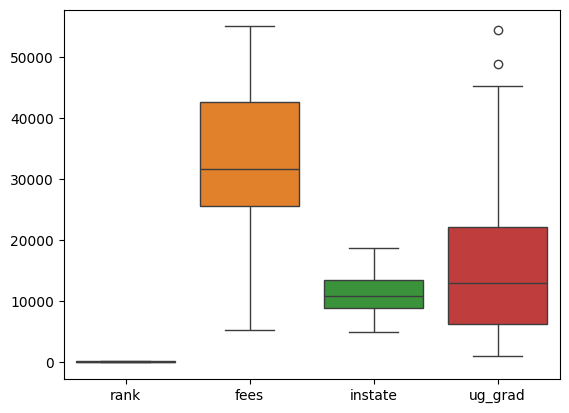

In [188]:
sns.boxplot(data=df)

In [191]:
#As we can see there are no such outliers in this data the up_grad 
# column shows few outliers but they are actually number of students and it should not be changed

In [192]:
# EDA

In [193]:
df.describe()

,rank,fees,instate,ug_grad
count,231.000000,231.000000,226.000000,231.000000
mean,113.982684,33769.246753,11324.237389,14946.619048
std,65.995518,10756.733516,2998.082065,10569.664095
min,1.000000,5300.000000,4965.000000,1001.000000
25%,56.000000,25693.000000,8946.800000,6238.500000
50%,111.000000,31608.000000,10948.500000,12949.000000
75%,171.000000,42721.000000,13469.500000,22145.500000
max,220.000000,55056.000000,18687.000000,54513.000000


In [194]:
# relationship between fees and rank

In [195]:
#We can clearly see that there is a neg co relation between fees and rank that is when if rank increases the fees decreases

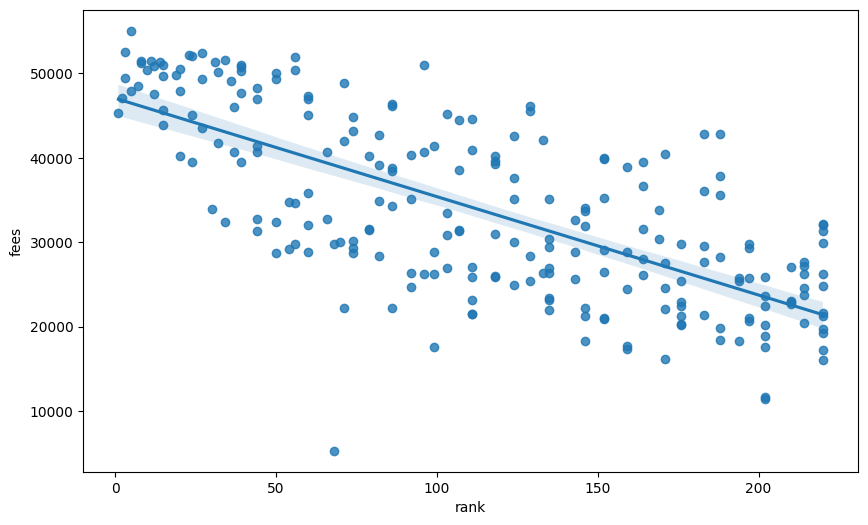

In [196]:
plt.figure(figsize=(10,6))
sns.regplot(x=df["rank"],y=df["fees"])
plt.show()

In [197]:
# relationship between fees and ug_grad that is number of ug student that are studing in the university

In [198]:
# this also shows a linear relationship but it does not have as much as impact as rank on the fees

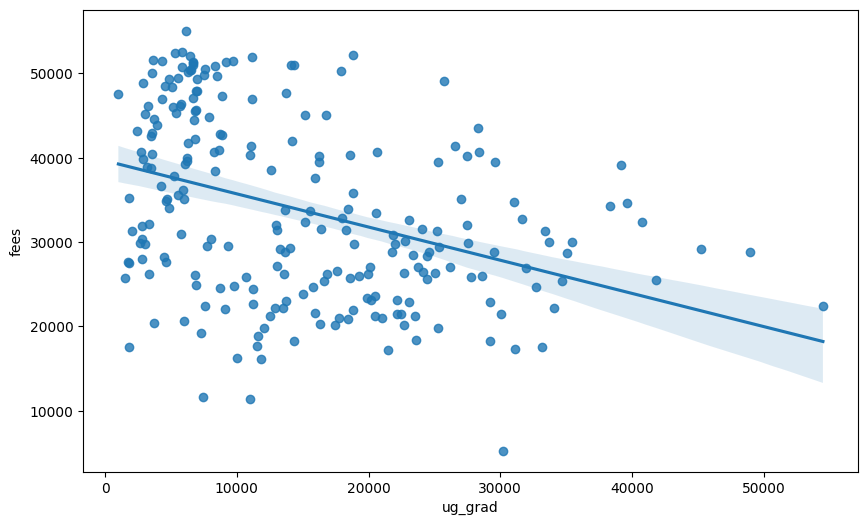

In [199]:
plt.figure(figsize=(10,6))
sns.regplot(x=df["ug_grad"],y=df["fees"])
plt.show()

In [200]:
#relationship between state and the fees 

In [201]:
state_avg_fees = df.groupby('state')['fees'].mean().reset_index()
state_avg_fees.head(20)

,state,fees
0,AK,22469.000000
1,AL,23516.500000
2,AR,23168.000000
3,AZ,27741.500000
4,CA,39144.409091
5,CO,34795.400000
6,CT,41042.666667
7,DC,42958.800000
8,DE,31420.000000
9,FL,29748.714286


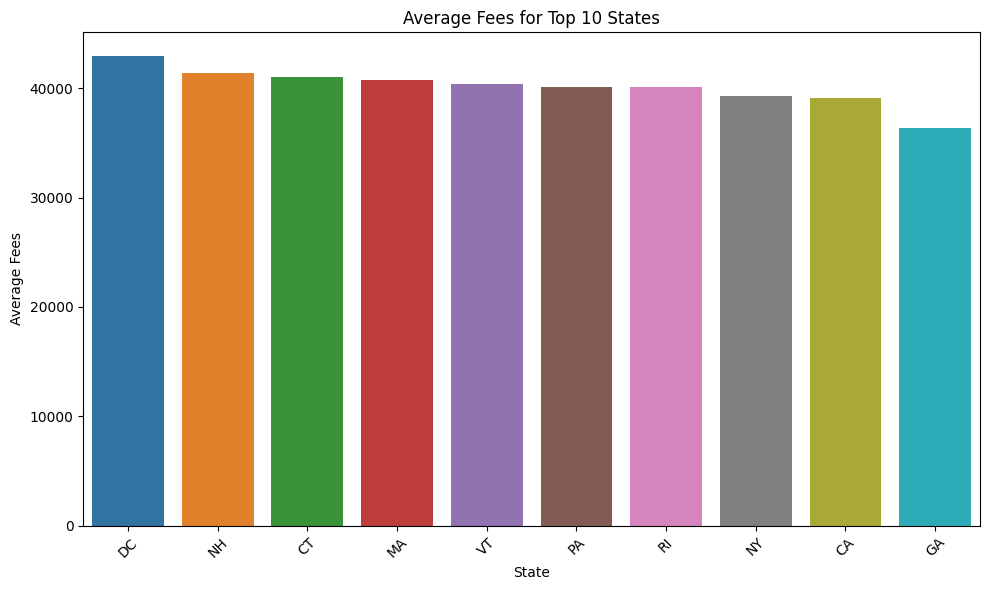

In [202]:
top_10_states = state_avg_fees.sort_values(by='fees', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_states, x='state', y='fees', hue = "state",legend =False)
plt.title('Average Fees for Top 10 States')
plt.xlabel('State')
plt.ylabel('Average Fees')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [203]:
df.head()

,name,rank,fees,instate,ug_grad,state,city
0,Princeton University,1,45320.0,14020.0,5402,NJ,Princeton
1,Harvard University,2,47074.0,13310.0,6699,MA,Cambridge
2,University of Chicago,3,52491.0,14095.8,5844,IL,Chicago
3,Yale University,3,49480.0,14066.0,5532,CT,New Haven
4,Columbia University,5,55056.0,8946.8,6102,NY,New York


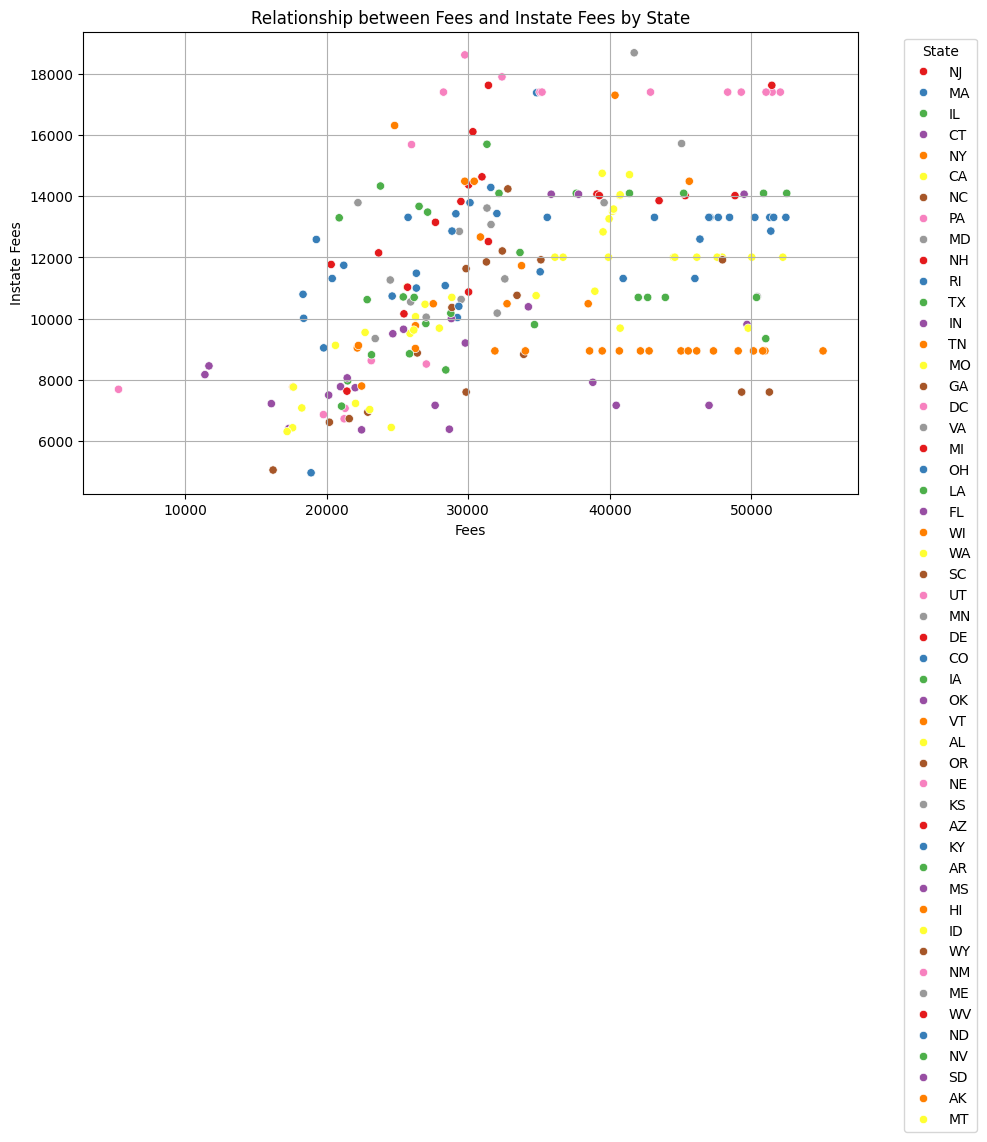

In [204]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='fees', y='instate', hue='state', palette='Set1')
plt.title('Relationship between Fees and Instate Fees by State')
plt.xlabel('Fees')
plt.ylabel('Instate Fees')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [205]:
# heatmap

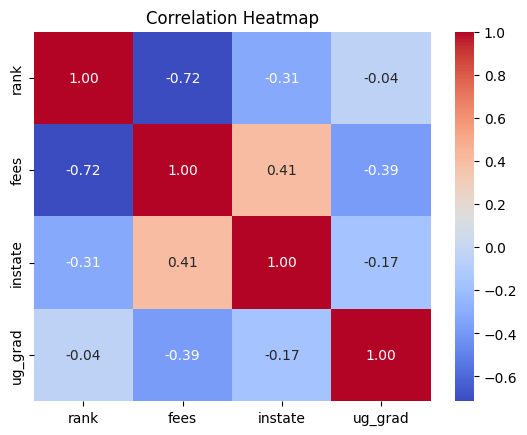

In [206]:
num_cols = df.select_dtypes(include=["int64","int","float"])
correlation_matrix = num_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<Figure size 1200x600 with 0 Axes>

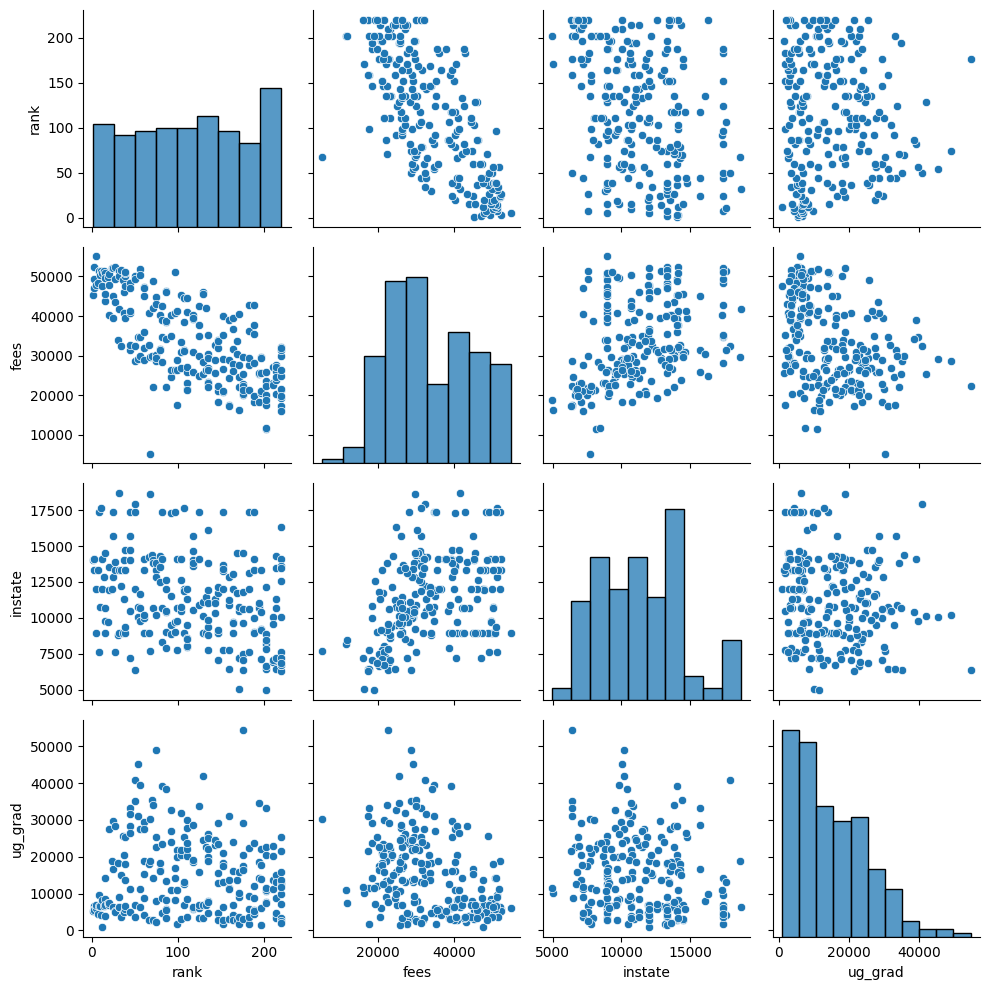

In [214]:
plt.figure(figsize=(12,6))
sns.pairplot(data=df)
plt.tight_layout()
plt.show()

In [215]:
# Encoding before model building 

In [216]:
df.head()

,name,rank,fees,instate,ug_grad,state,city
0,Princeton University,1,45320.0,14020.0,5402,NJ,Princeton
1,Harvard University,2,47074.0,13310.0,6699,MA,Cambridge
2,University of Chicago,3,52491.0,14095.8,5844,IL,Chicago
3,Yale University,3,49480.0,14066.0,5532,CT,New Haven
4,Columbia University,5,55056.0,8946.8,6102,NY,New York


In [217]:
# the city column does not play any role here as i will use state insted so i am droping that now

In [218]:
df.drop(columns=["city"],inplace=True)

In [219]:
df.head()

,name,rank,fees,instate,ug_grad,state
0,Princeton University,1,45320.0,14020.0,5402,NJ
1,Harvard University,2,47074.0,13310.0,6699,MA
2,University of Chicago,3,52491.0,14095.8,5844,IL
3,Yale University,3,49480.0,14066.0,5532,CT
4,Columbia University,5,55056.0,8946.8,6102,NY


In [220]:
# encoding the state column using frequency encoding 

In [222]:
location_freq = df['state'].value_counts(normalize=True).to_dict()
df['state_fre'] = df['state'].map(location_freq)

In [223]:
df.drop(columns=["state"],inplace=True)

In [224]:
df.head()

,name,rank,fees,instate,ug_grad,state_fre
0,Princeton University,1,45320.0,14020.0,5402,0.030303
1,Harvard University,2,47074.0,13310.0,6699,0.064935
2,University of Chicago,3,52491.0,14095.8,5844,0.047619
3,Yale University,3,49480.0,14066.0,5532,0.012987
4,Columbia University,5,55056.0,8946.8,6102,0.090909


In [225]:
df.drop(columns=["name"],inplace=True)

In [226]:
df.head()

,rank,fees,instate,ug_grad,state_fre
0,1,45320.0,14020.0,5402,0.030303
1,2,47074.0,13310.0,6699,0.064935
2,3,52491.0,14095.8,5844,0.047619
3,3,49480.0,14066.0,5532,0.012987
4,5,55056.0,8946.8,6102,0.090909


In [230]:
# there are few null values in instate coulmns so i will just replace them with mode of the column

In [241]:
df["instate"]=df["instate"].fillna(df["instate"].mode().iloc[0])

In [242]:
df.isna().sum()

rank         0
fees         0
instate      0
ug_grad      0
state_fre    0
dtype: int64

In [243]:
# model building and evaluation

Linear Regression - MSE: 27131597.480406526, R2 Score: 0.7336204018693148


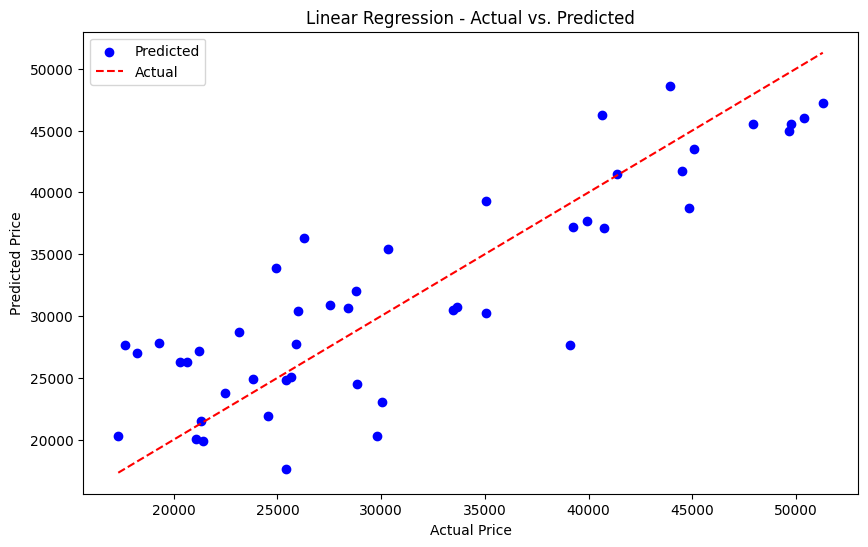

Ridge Regression - MSE: 27154140.68824009, R2 Score: 0.733399071346937


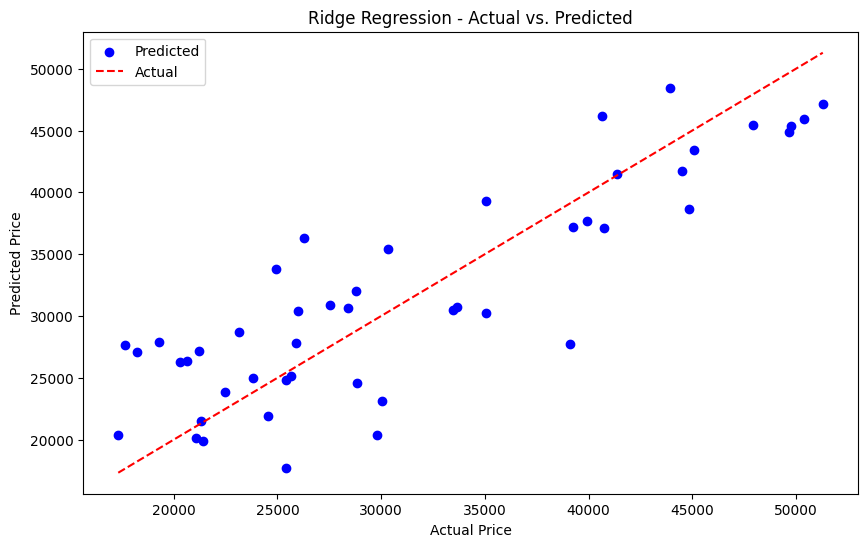

Lasso Regression - MSE: 27130461.45364938, R2 Score: 0.7336315554459243


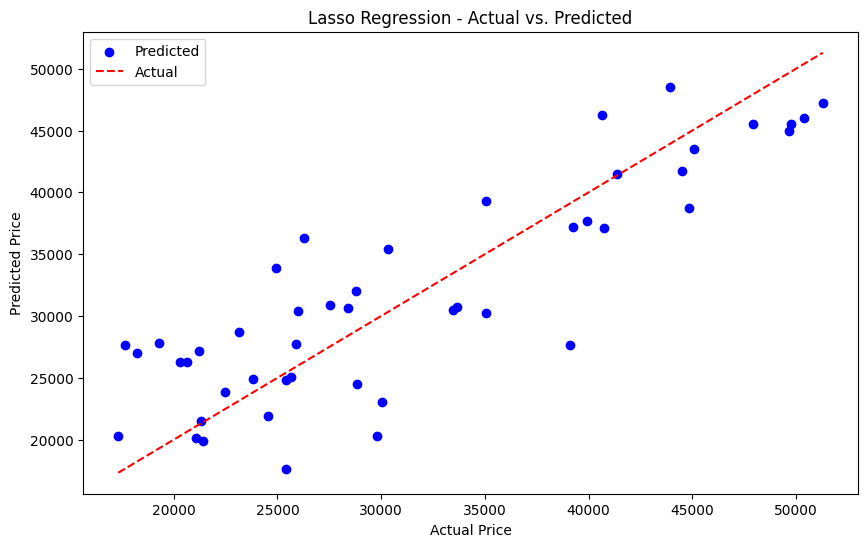

Elastic Net - MSE: 35962139.00561491, R2 Score: 0.6469216328617005


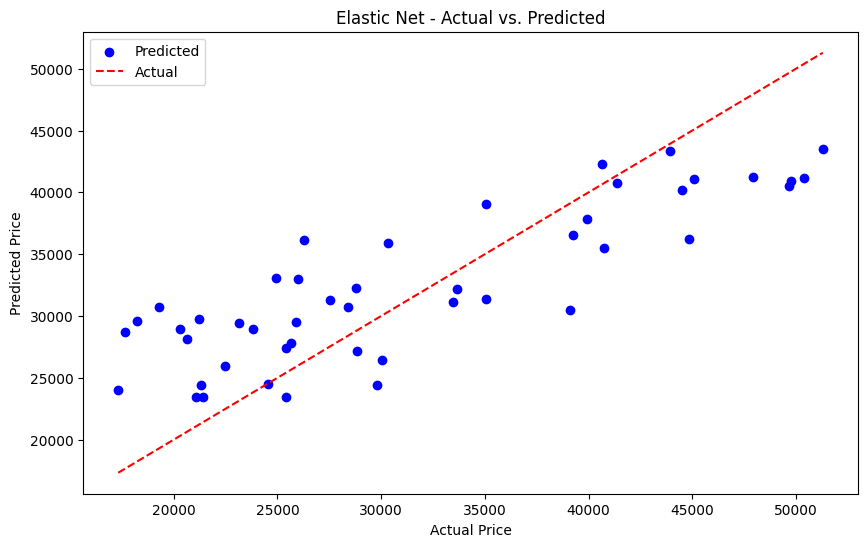

Decision Tree - MSE: 29995611.914893616, R2 Score: 0.7055013419927224


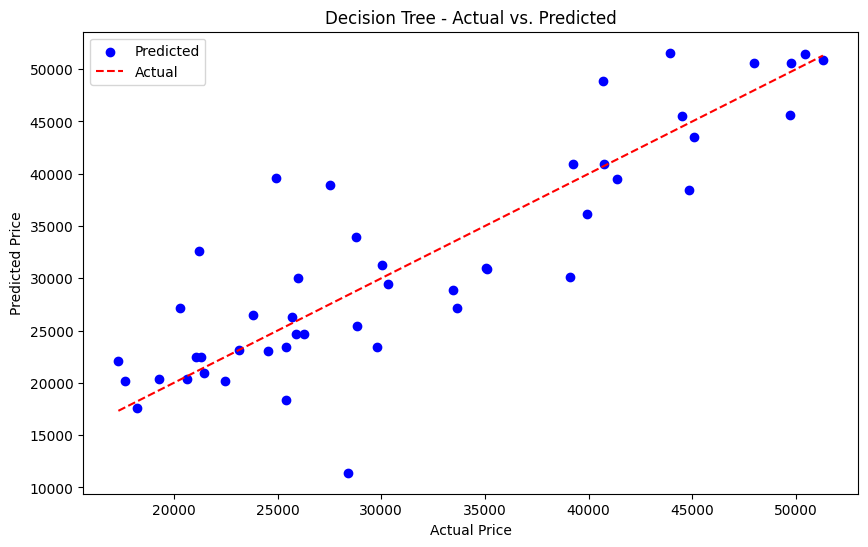

Random Forest - MSE: 22960315.57715744, R2 Score: 0.7745742895967042


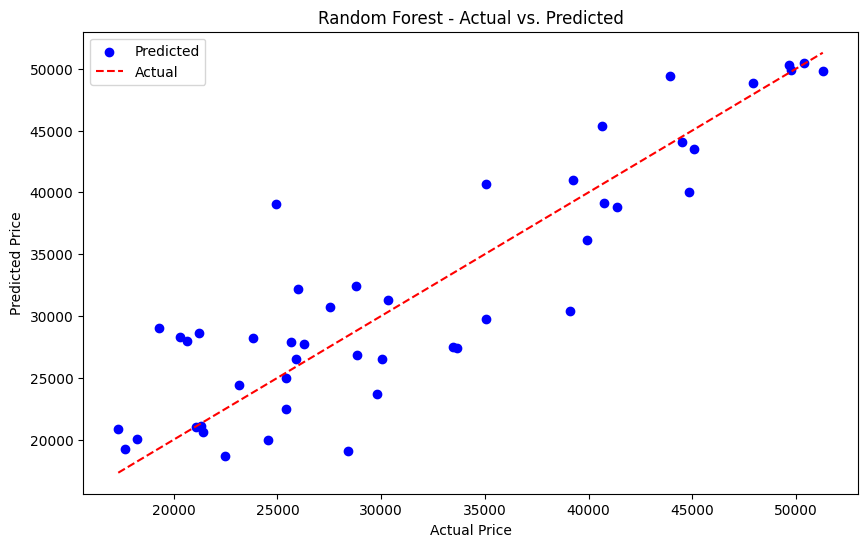

Gradient Boosting - MSE: 21209849.32364483, R2 Score: 0.7917604688288247


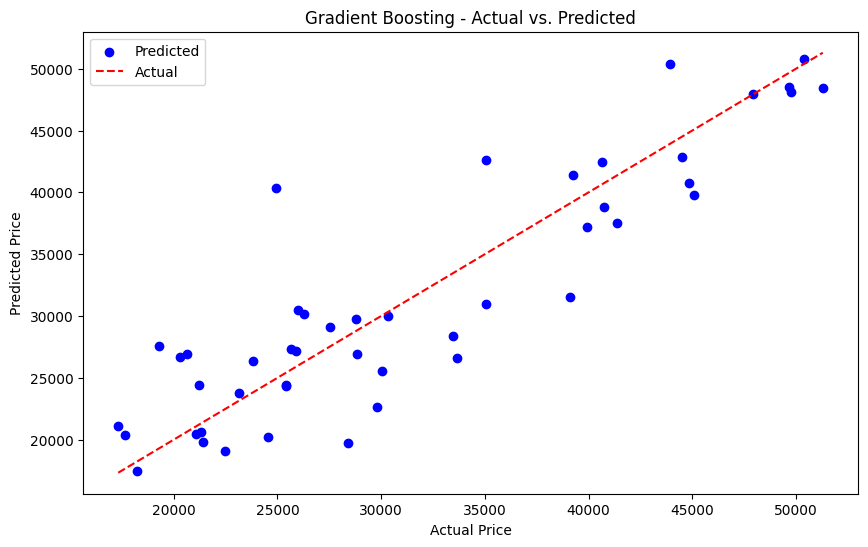

Support Vector Regression - MSE: 102148247.47316444, R2 Score: -0.0028974199291276204


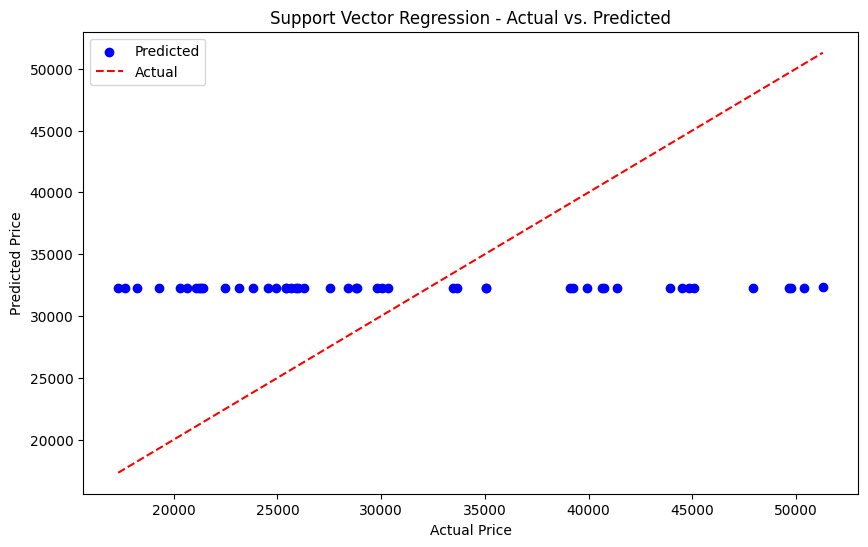

In [244]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop(columns=['fees'])
y = df['fees']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regression': SVR()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - MSE: {mse}, R2 Score: {r2}")
    
    # Ploting the  actual vs. predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', label='Predicted')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual')
    plt.title(f"{name} - Actual vs. Predicted")
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.legend()
    plt.show()
